# Initial imports
We import associated libraries like pandas and numpy to load and interact with dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import stemgraphic

# Loading Dataset
We use diabetes dataset in this notebook. So the first step is to load the dataset using pandas library and pandas DataFrame data type.

In [2]:
dataset_path = "../datasets/diabetes.csv"
df = pd.read_csv(dataset_path)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


# Random Sampling

In [3]:
df.sample(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
296,67,1,20.7,83.0,170,99.8,59.0,3.00,4.0254,77,89
114,55,1,36.6,113.0,199,94.4,43.0,4.63,5.7301,97,258
396,25,2,23.5,88.0,143,80.8,55.0,3.00,3.5835,83,43
215,56,2,35.1,123.0,164,95.0,38.0,4.00,5.0434,117,263
17,68,2,27.5,111.0,214,147.0,39.0,5.00,4.9416,91,144
155,41,2,32.0,109.0,251,170.6,49.0,5.00,5.0562,103,186
180,38,2,26.8,105.0,181,119.2,37.0,5.00,4.8203,91,107
214,57,1,23.3,88.0,155,63.6,78.0,2.00,4.2047,78,65
135,47,1,31.6,84.0,154,88.0,30.0,5.10,5.1985,105,272
72,66,2,26.0,91.0,264,146.6,65.0,4.00,5.5683,87,202


# Scales
## Interval Scale
If an scale that is a real number, preserves the ratio of every two difference, its called an Internal Scale.

For example in below we can show that column S2 that shows ldl of each person by the unit of mg/dL , is a kind of interval scale.

In [4]:
def get_interval_scale_ratio(x1, x2, x3, x4):
    return (x4 - x3) / (x2 - x1)

x1, x2, x3, x4 = df[:4]['S2']
print("The ratio in unit mg/dL is: ", get_interval_scale_ratio(x1, x2, x3, x4))


The ratio in unit mg/dL is:  3.780000000000001


And now we convert the unit from mg/dL to g/L in order to compare the ratio of new scale with previouse one.

In [5]:
def mgperdl_to_gperl(x):
    return x * 0.01

y1, y2, y3, y4 = [mgperdl_to_gperl(x) for x in [x1, x2, x3, x4]]
print("The ratio in unit g/L is: ", get_interval_scale_ratio(y1, y2, y3, y4))


The ratio in unit g/L is:  3.780000000000002


## Ratio Scale
If a real number scale, preserves the ratio, it is called Ratio Scale.
We use x1 and x2 and also y1 and y2 to demonstrate that ldl is a kind of Ratio Scale.

In [6]:
print("The ratio of x1 and x2 is: ", x1/ x2)
print("The ratio of y1 and y2 is: ", y1/ y2)

The ratio of x1 and x2 is:  0.9031007751937985
The ratio of y1 and y2 is:  0.9031007751937985


# Variables
There are two kinds of variables that is a feature of all data.
1. Grouping Variables
2. Quantitative Variables

## Grouping Variables
A grouping variable is a variable that is used to classify datas. It is measured by nominal or ordinal scales and classifies due to them.

In [7]:
grouped_data = df.groupby('SEX')
print("SEX 1 group: ")
print(grouped_data.get_group(1).head())
print()
print("SEX 2 group: ")
print(grouped_data.get_group(2).head())


SEX 1 group: 
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
5   23    1  22.6   89.0  139   64.8  61.0  2.0  4.1897  68   97
9   29    1  30.0   85.0  180   93.4  43.0  4.0  5.3845  88  310

SEX 2 group: 
   AGE  SEX   BMI     BP   S1     S2    S3    S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.00  4.8598  87  151
2   72    2  30.5   93.0  156   93.6  41.0  4.00  4.6728  85  141
6   36    2  22.0   90.0  160   99.6  50.0  3.00  3.9512  82  138
7   66    2  26.2  114.0  255  185.0  56.0  4.55  4.2485  92   63
8   60    2  32.1   83.0  179  119.4  42.0  4.00  4.4773  94  110


# Rounding continuous data 
ًWe can round datas of column S5 to two decimal places and also datas of column S2 to 0 decimal places at the same time.

In [8]:
df.round({'S5': 2, 'S2': 0}).head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.0,38.0,4.0,4.86,87,151
1,48,1,21.6,87.0,183,103.0,70.0,3.0,3.89,69,75
2,72,2,30.5,93.0,156,94.0,41.0,4.0,4.67,85,141
3,24,1,25.3,84.0,198,131.0,40.0,5.0,4.89,89,206
4,50,1,23.0,101.0,192,125.0,52.0,4.0,4.29,80,135


# Frequency
## Types of Frequency
- Absolute Frequency
- Relative Frequency
- Cumulative Frequency
- Cumulative Relative Frequency


We can group S2 column (ldl) to 30 mg/dL width intervals. And then calculate each interval's frequency.

In [9]:
s2_freq_df = df.copy()
n = 30
first = 70
s2_freq_df["s2_ranges"] = (s2_freq_df['S2']
         .sub(first).floordiv(n)
         .mul(n).add(first).map(lambda x: pd.Interval(x, x + 30))
         )
s2_freq_df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,s2_ranges
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151,"(70.0, 100.0]"
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75,"(100.0, 130.0]"
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141,"(70.0, 100.0]"
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206,"(130.0, 160.0]"
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135,"(100.0, 130.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178,"(100.0, 130.0]"
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104,"(160.0, 190.0]"
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132,"(100.0, 130.0]"
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220,"(100.0, 130.0]"


In [10]:
absolute_frequencies = s2_freq_df["s2_ranges"].value_counts().sort_index()
absolute_frequencies.rename("f_i", inplace=True)
print("Absolute Frequencies are as below: ")
print(absolute_frequencies)
print()

Absolute Frequencies are as below: 
(40.0, 70.0]       26
(70.0, 100.0]     110
(100.0, 130.0]    182
(130.0, 160.0]     89
(160.0, 190.0]     27
(190.0, 220.0]      7
(220.0, 250.0]      1
Name: f_i, dtype: int64



In [11]:
relative_frequencies = s2_freq_df["s2_ranges"].value_counts(normalize=True).sort_index()
relative_frequencies.rename("r_i", inplace=True)
print("Relative Frequencies are as below: ")
print(relative_frequencies)
print()

Relative Frequencies are as below: 
(40.0, 70.0]      0.058824
(70.0, 100.0]     0.248869
(100.0, 130.0]    0.411765
(130.0, 160.0]    0.201357
(160.0, 190.0]    0.061086
(190.0, 220.0]    0.015837
(220.0, 250.0]    0.002262
Name: r_i, dtype: float64



In [12]:
cumulative_frequencies = absolute_frequencies.cumsum()
cumulative_frequencies.rename("g_i", inplace=True)
print("Cumulative Frequencies are as below: ")
print(cumulative_frequencies)
print()

Cumulative Frequencies are as below: 
(40.0, 70.0]       26
(70.0, 100.0]     136
(100.0, 130.0]    318
(130.0, 160.0]    407
(160.0, 190.0]    434
(190.0, 220.0]    441
(220.0, 250.0]    442
Name: g_i, dtype: int64



In [13]:
cumulative_relative_frequencies = relative_frequencies.cumsum()
cumulative_relative_frequencies.rename("s_i", inplace=True)
print("Cumulative Relative Frequencies are as below: ")
print(cumulative_relative_frequencies)
print()

Cumulative Relative Frequencies are as below: 
(40.0, 70.0]      0.058824
(70.0, 100.0]     0.307692
(100.0, 130.0]    0.719457
(130.0, 160.0]    0.920814
(160.0, 190.0]    0.981900
(190.0, 220.0]    0.997738
(220.0, 250.0]    1.000000
Name: s_i, dtype: float64



Also we can merge 3 series into one dataframe

In [14]:
s2_all_freq_df = pd.concat([absolute_frequencies, relative_frequencies, cumulative_frequencies, cumulative_relative_frequencies], axis=1)
s2_all_freq_df["c_i"] = s2_all_freq_df.index.map(lambda x: (x.left + x.right) / 2)
s2_all_freq_df

,f_i,r_i,g_i,s_i,c_i
"(40.0, 70.0]",26,0.058824,26,0.058824,55.0
"(70.0, 100.0]",110,0.248869,136,0.307692,85.0
"(100.0, 130.0]",182,0.411765,318,0.719457,115.0
"(130.0, 160.0]",89,0.201357,407,0.920814,145.0
"(160.0, 190.0]",27,0.061086,434,0.981900,175.0
"(190.0, 220.0]",7,0.015837,441,0.997738,205.0
"(220.0, 250.0]",1,0.002262,442,1.000000,235.0


# Plots

### Pie Plot

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y  \
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151   
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75   
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141   
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206   
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135   
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...   
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178   
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104   
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132   
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220   
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57   

      BMI_bins  
0        OBESE  
1      HEALTHY  
2        OBESE  
3    OVERWEIGT  
4      HEALTHY  
..         ...  
437 

<AxesSubplot:>

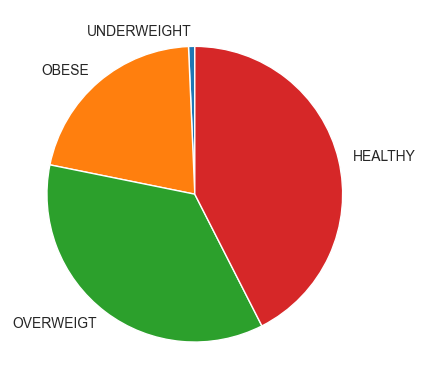

In [15]:
bmi_labels = ["UNDERWEIGHT", "HEALTHY", "OVERWEIGT", "OBESE"]
df_bmi_grouped = df.copy()
df_bmi_grouped["BMI_bins"] = pd.cut(
    df_bmi_grouped['BMI'], bins=[0, 18.5, 25, 30, 40], labels=bmi_labels)
print(df_bmi_grouped)
df_bmi_grouped = df_bmi_grouped.groupby(["BMI_bins"]).size().sort_values()
df_bmi_grouped.plot.pie(y="BMI_bins", startangle=90)


### Bar Plot

<AxesSubplot:xlabel='c_i'>

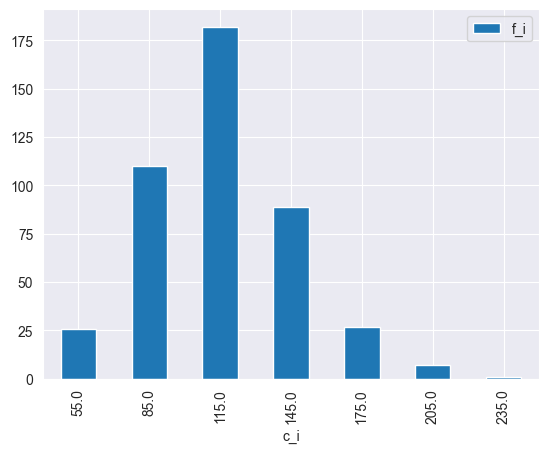

In [16]:
s2_all_freq_df.plot.bar(x='c_i', y='f_i')

### Box Plot

<AxesSubplot:>

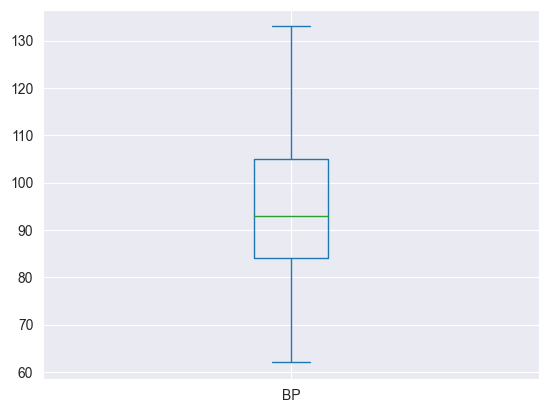

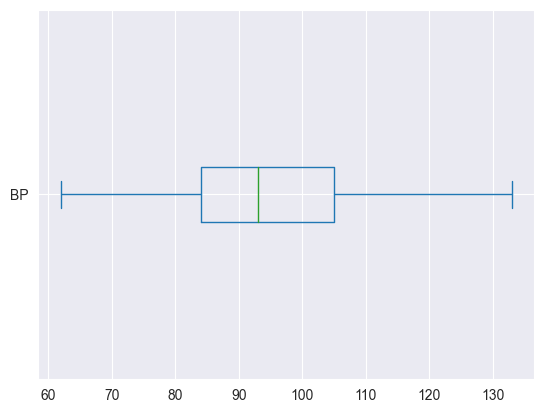

In [17]:
df.plot.box(column=["BP"], vert=True)
df.plot.box(column=["BP"], vert=False)

### Line Chart

<AxesSubplot:xlabel='S3_bins'>

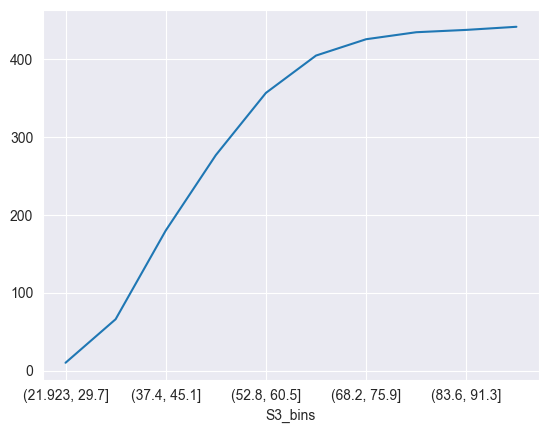

In [18]:
df_s3_grouped = df.copy()
df_s3_grouped["S3_bins"] = pd.cut(df_s3_grouped["S3"], bins=10)
df_s3_grouped = df_s3_grouped.groupby(["S3_bins"]).size().cumsum()
df_s3_grouped.plot.line(y="S3_bins")

### Heatmap

<AxesSubplot:>

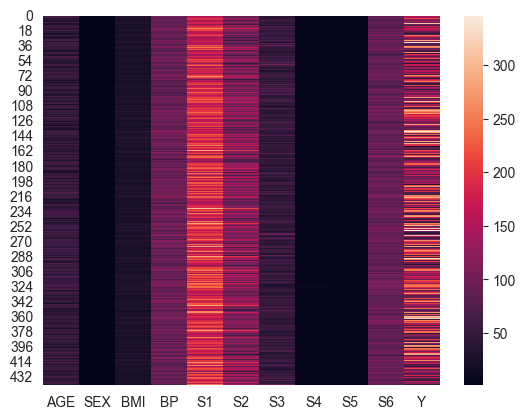

In [19]:
sb.heatmap(df)

### Histogram

<AxesSubplot:ylabel='Frequency'>

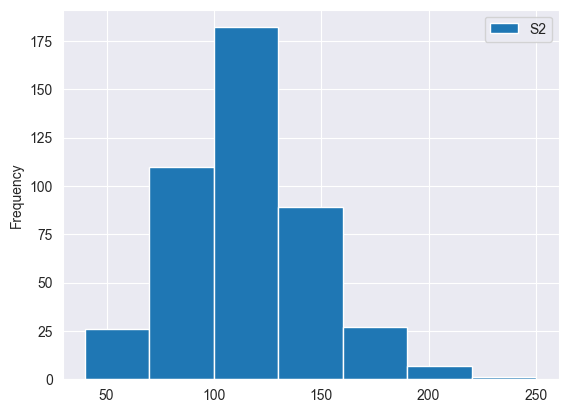

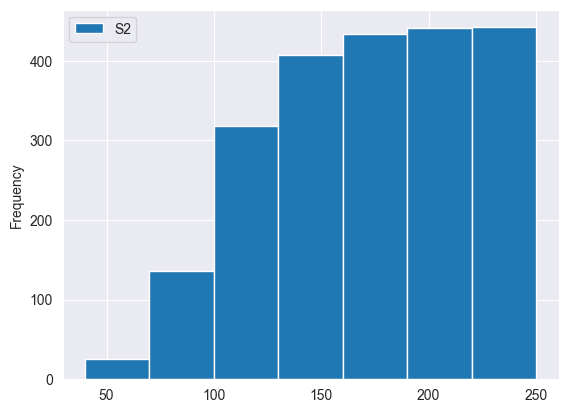

In [20]:

df.plot.hist(column=["S2"], bins=np.arange(40, 251, 30))
df.plot.hist(column=["S2"], bins=np.arange(40, 251, 30), cumulative=1)

### Frequency Diagram (+ Qumulative)

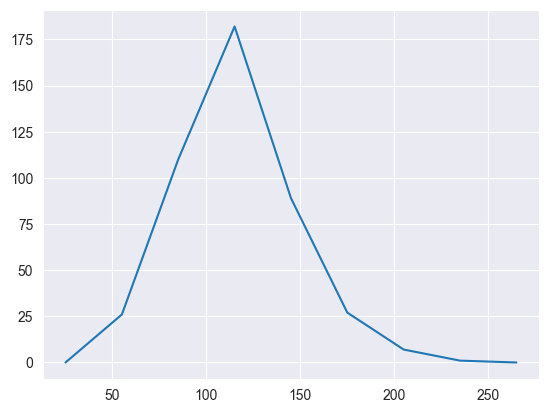

In [21]:
x = np.array([s2_all_freq_df.iloc[0]['c_i'] - 30, *s2_all_freq_df['c_i'], s2_all_freq_df.iloc[-1]['c_i'] + 30])
y = np.array([0, *s2_all_freq_df['f_i'], 0])
plt.plot(x, y)

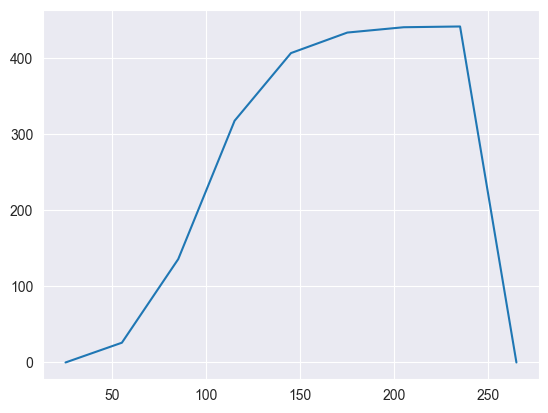

In [22]:
x = np.array([s2_all_freq_df.iloc[0]['c_i'] - 30, *s2_all_freq_df['c_i'], s2_all_freq_df.iloc[-1]['c_i'] + 30])
y = np.array([0, *s2_all_freq_df['g_i'], 0])
plt.plot(x, y)

### Normal Frequency Curve

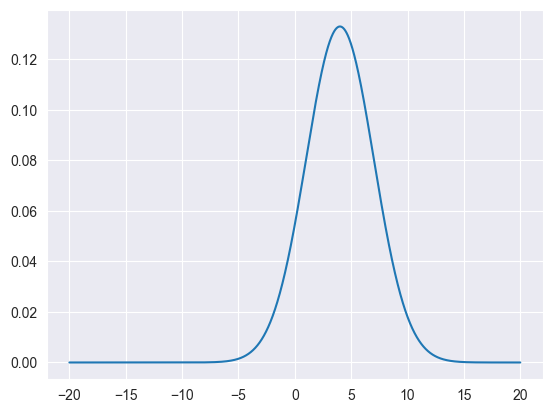

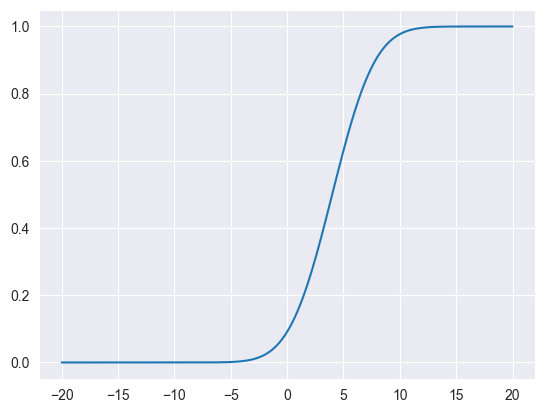

In [52]:
from scipy.stats import norm
  
x_axis = np.arange(-20, 20, 0.001)
mean = 4
std = 3
  
plt.plot(x_axis, norm.pdf(x_axis, mean, std))
plt.show()
plt.plot(x_axis, norm.cdf(x_axis, mean, std))
plt.show()

# Estimates of Location

## Mean (Arithmetic)
We can simply find the mean of the data in a column by calling `mean` method on it.

In [24]:
df_s2_mean = df["S2"].mean()
print("The mean of column 'S2' is {} mg/dL".format(df_s2_mean))

The mean of column 'S2' is 115.43914027149322 mg/dL


Also we can call mean method on whole dataframe to represent mean of every column in the table in a Pandas Series.

In [25]:
print("The mean of each column are as below: ")
df.mean()

The mean of each column are as below: 


AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

## Geometric Mean
The pandas dataframe class itself does not provide a method to calculate geometric mean.

So we get help from `scipy` library.

In [26]:
from scipy.stats.mstats import gmean
df_s2_gmean = gmean(df["S2"])
print("The geometric mean of column 'S2' is {} mg/dL".format(df_s2_gmean))

The geometric mean of column 'S2' is 111.35616399841862 mg/dL


And we can also calculate the geometric mean for every column by the function provided by `scipy`.

In [53]:
for col, gm in zip(df.columns, gmean(df)):
    print("{} : {}".format(col, gm))
gmean(df)

AGE : 46.521512610855865
SEX : 1.3835030187492348
BMI : 26.01987024532326
BP : 93.64667118198474
S1 : 185.9916451463964
S2 : 111.35616399841862
S3 : 48.19777166015359
S4 : 3.875097032384228
S5 : 4.612302952172216
S6 : 90.53479855062294
Y : 131.80491650792933


array([ 46.52151261,   1.38350302,  26.01987025,  93.64667118,
       185.99164515, 111.356164  ,  48.19777166,   3.87509703,
         4.61230295,  90.53479855, 131.80491651])

## Harmonic Mean
Another kind of mean is harmonic mean that is also provided by `scipy` library

In [28]:
from scipy.stats.mstats import hmean
df_s2_gmean = hmean(df["S2"])
print("The harmonic mean of column 'S2' is {} mg/dL".format(df_s2_gmean))

The harmonic mean of column 'S2' is 107.0570029527991 mg/dL


And we can also calculate the harmonic mean for every column by the function provided by `scipy`.

In [29]:
for col, gm in zip(df.columns, hmean(df)):
    print("{} : {}".format(col, gm))

AGE : 44.270304590946914
SEX : 1.3057607090103396
BMI : 25.676483668833843
BP : 92.6547948610767
S1 : 182.8221227834557
S2 : 107.0570029527991
S3 : 46.66701637208283
S4 : 3.687057828710031
S5 : 4.5833734282375405
S6 : 89.80214794943417
Y : 112.14267890201872


## Median
We can simply find the median of the data in a column by calling `median` method on it.

In [30]:
df_s2_median = df["S2"].median()
print("The median of column 'S2' is {} mg/dL".format(df_s2_median))

The median of column 'S2' is 113.0 mg/dL


We can also calculate the whole dataframe's median easily.

In [31]:
df.median()

AGE     50.00000
SEX      1.00000
BMI     25.70000
BP      93.00000
S1     186.00000
S2     113.00000
S3      48.00000
S4       4.00000
S5       4.62005
S6      91.00000
Y      140.50000
dtype: float64

## Quantiles
Quantiles also can be calculated by method `quantile`. The quantile 0.5 is exactly the median.

In [32]:
df.quantile(q=0.5)

AGE     50.00000
SEX      1.00000
BMI     25.70000
BP      93.00000
S1     186.00000
S2     113.00000
S3      48.00000
S4       4.00000
S5       4.62005
S6      91.00000
Y      140.50000
Name: 0.5, dtype: float64

But you can also call this method to calculate another quantiles like 0.1.

In [33]:
df.quantile(q=0.6)

AGE     53.0000
SEX      2.0000
BMI     26.8600
BP      97.0000
S1     195.0000
S2     121.0000
S3      52.0000
S4       4.0000
S5       4.7791
S6      93.0000
Y      168.0000
Name: 0.6, dtype: float64

## Mode
To calculate the mode of each column you can use `mode` method like below. Note that there may be more than one modes in the data, because of equality betweeen their frequencies.

In [34]:
df['S2'].mode()

0    114.8
1    125.8
Name: S2, dtype: float64

And of course you can call `mode` method on the whole dataframe instead of just one column.

In [35]:
df.mode()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,53.0,1.0,23.5,83.0,162,114.8,46.0,3.0,4.4427,92.0,72
1,NaN,NaN,24.1,93.0,184,125.8,NaN,NaN,NaN,NaN,200


## Trimmed Mean
Using scipy we can calculate trimmed mean for a column or even whole dataframe.

In [36]:
from scipy.stats import trim_mean
df_s2_tmean = trim_mean(df["S2"], proportiontocut=0.15)
print("Trimmed mean of S2 column with proportion cut of 15% is {}.".format(df_s2_tmean))
print("Trimmed mean for whole dataframe with proportion cut of 15% is as below: ")
for col, mean in zip(df.columns, trim_mean(df, 0.15)):
    print("{} : {}".format(col, mean))

Trimmed mean of S2 column with proportion cut of 15% is 114.25709677419354.
Trimmed mean for whole dataframe with proportion cut of 15% is as below: 
AGE : 49.035483870967745
SEX : 1.4548387096774194
BMI : 26.044838709677425
BP : 94.01070967741936
S1 : 187.55483870967743
S2 : 114.25709677419354
S3 : 48.67903225806452
S4 : 3.91558064516129
S5 : 4.622088064516129
S6 : 90.95483870967742
Y : 145.5483870967742


# Estimates of Variability

## Range
Finding range in python. The difference between min and max.

In [37]:
df_s2_range = df["S2"].max() - df["S2"].min()
df_s2_range
print("The range of column S2 is : {}.".format(df_s2_range))

print("And below is the range of whole dataframe: ")
df.max() - df.min()

The range of column S2 is : 200.8.
And below is the range of whole dataframe: 


AGE     60.0000
SEX      1.0000
BMI     24.2000
BP      71.0000
S1     204.0000
S2     200.8000
S3      77.0000
S4       7.0900
S5       2.8489
S6      66.0000
Y      321.0000
dtype: float64

## Mean Absolute Deviation
The mean absolute deviation can be calculated by `mad` method

In [38]:
df_s2 = df["S2"].copy()
df_s2_mad = (df_s2 - df_s2.mean()).abs().mean()
print("The mean absolute deviation of column S2 is: {}.".format(df_s2_mad))
print("And the mean absolute deviation of whole dataframe are as below: ")
(df - df.mean()).abs().mean()

The mean absolute deviation of column S2 is: 23.94278065559673.
And the mean absolute deviation of whole dataframe are as below: 


AGE    10.817448
SEX     0.497993
BMI     3.558917
BP     11.409825
S1     27.156856
S2     23.942781
S3     10.190480
S4      1.005483
S5      0.424911
S6      8.942446
Y      65.764573
dtype: float64

## Variance and Standard Deviation
Variance and Standard Deviation can be calculated by `var` and `std` method.

In [39]:
df_s2_var = df["S2"].var()
df_s2_std = df["S2"].std()
print("Variance of column S2 is {} and its standard deviation is {}.".format(df_s2_var, df_s2_std))
print("Variance of whole dataframe: ")
print(df.var())
print("Standard Deviation of whole dataframe: ")
print(df.std())

Variance of column S2 is 924.9554940437713 and its standard deviation is 30.413080969276546.
Variance of whole dataframe: 
AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64
Standard Deviation of whole dataframe: 
AGE    13.109028
SEX     0.499561
BMI     4.418122
BP     13.831283
S1     34.608052
S2     30.413081
S3     12.934202
S4      1.290450
S5      0.522391
S6     11.496335
Y      77.093005
dtype: float64


## Data Standardization

In [40]:
def standardize_data(data):
    return (data - data.mean()) / data.std()

standardized_data_s2 = standardize_data(df['S2'])

print("Here's standardized data in another dataframe.")
print(standardized_data_s2)

print("The mean of standardized data is 0 and its variance is 1.")
print("Mean =", round(standardized_data_s2.mean(), 4))
print("Var =", round(standardized_data_s2.var(), 4))

Here's standardized data in another dataframe.
0     -0.731236
1     -0.402430
2     -0.718084
3      0.524802
4      0.327519
         ...   
437   -0.053896
438    1.662471
439   -0.290636
440    0.320943
441    0.583988
Name: S2, Length: 442, dtype: float64
The mean of standardized data is 0 and its variance is 1.
Mean = -0.0
Var = 1.0


## Coefficient of variation

In [41]:
df_s2_cv = df["S2"].std() / df["S2"].mean()
print("Coefficient of Variation of S2 is: {}.".format(df_s2_cv))

print("Coefficient of Variation of whole dataframe are as below: ")
df.std() / df.mean()

Coefficient of Variation of S2 is: 0.26345553941020483.
Coefficient of Variation of whole dataframe are as below: 


AGE    0.270188
SEX    0.340225
BMI    0.167507
BP     0.146135
S1     0.182976
S2     0.263456
S3     0.259783
S4     0.317044
S5     0.112550
S6     0.125973
Y      0.506746
dtype: float64

## Quarters' half range
To calculate half range of some data we can calculate average of first and third quarter.

In [42]:
df_s2_qhr = (df["S2"].quantile(0.75) - df["S2"].quantile(0.25)) / 2
print("Quarters' half range of column S2 is", df_s2_qhr)

print("Quarters' half range of whole dataframe: ")
(df.quantile(0.75) - df.quantile(0.25)) / 2

Quarters' half range of column S2 is 19.225
Quarters' half range of whole dataframe: 


AGE    10.37500
SEX     0.50000
BMI     3.03750
BP     10.50000
S1     22.75000
S2     19.22500
S3      8.75000
S4      1.00000
S5      0.36025
S6      7.37500
Y      62.25000
dtype: float64

### Interquartile range
Interquartile range is the first derivative of Quarters' half range. It is a kind of estimates of location.

In [43]:
df_s2_iqr = (df["S2"].quantile(0.25) + df["S2"].quantile(0.75)) / 2
print("Inter-quartile range of column S2 is", df_s2_iqr)

print("Inter-quartile range of whole dataframe: ")
(df.quantile(0.25) + df.quantile(0.75)) / 2

Interquartile range of column S2 is 115.275
Interquartile range of whole dataframe: 


AGE     48.62500
SEX      1.50000
BMI     26.23750
BP      94.50000
S1     187.00000
S2     115.27500
S3      49.00000
S4       4.00000
S5       4.63695
S6      90.62500
Y      149.25000
dtype: float64

# Moment
To calculate the `r`th central moment you can run as below: 

In [44]:
from scipy.stats import moment
r = 3
moment(df["S2"], r)

12198.419374171195

# Skewness

In [45]:
df["S6"].skew()

0.2079166161507082

- We can calculate whole dataframe's skewness like below.

In [46]:
df.skew()

AGE   -0.231382
SEX    0.127385
BMI    0.598148
BP     0.290658
S1     0.378108
S2     0.436592
S3     0.799255
S4     0.735374
S5     0.291754
S6     0.207917
Y      0.440563
dtype: float64

# Kurtosis

In [47]:
df["S4"].kurtosis()

0.4444016718457502

- We can calculate whole dataframe's kurtosis like below.

In [48]:
df.kurtosis()

AGE   -0.671224
SEX   -1.992811
BMI    0.095094
BP    -0.532797
S1     0.232948
S2     0.601381
S3     0.981507
S4     0.444402
S5    -0.134367
S6     0.236917
Y     -0.883057
dtype: float64

# Stem and Leaf Diagram

(<Figure size 750x450 with 1 Axes>, <Axes:>)

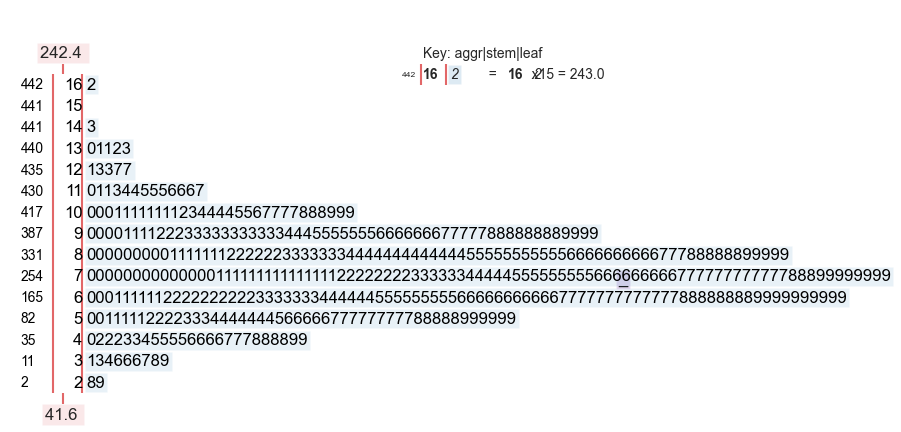

In [56]:
stemgraphic.stem_graphic(df["S2"], scale=15)

# Normal Curve

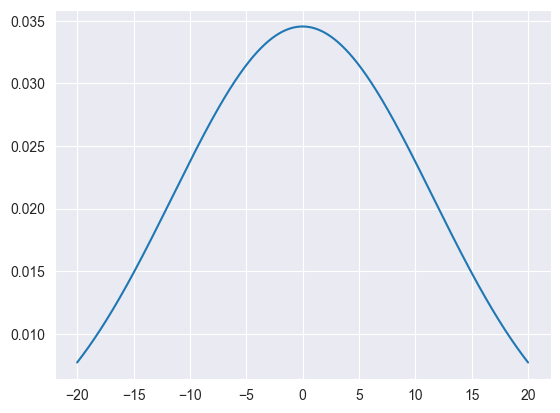

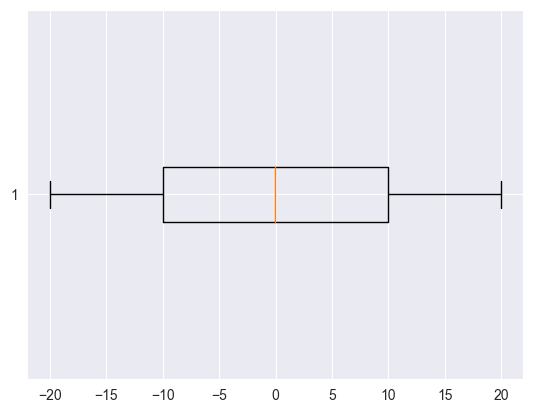

In [50]:
from scipy.stats import norm

x_axis = np.arange(-20, 20, 0.01)
mean = x_axis.mean()
std = x_axis.std()
plt.plot(x_axis, norm.pdf(x_axis, mean, std))
plt.show()
plt.boxplot(x_axis, vert=False)
plt.show()